In [1]:
# External Modules
import os
from  matplotlib import dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# Internal Modules
import explanatory_images as img_gen

# Aspect Ratio

This notebook covers one of the most overlooked, yet critical, aspects of creating charts, **aspect ratio.**

First, we'll set the ground by setting definitions, clarifying misconceptions, and showing how to set the aspect ratio with `matplotlib`.

Then, recommendations are given for the correct use of aspect ratios for two different types of graphs: 
- Graph with shared units (i.e., where X and Y have the same units).
- Graph with distinct units (ex. time series where X is time and Y may be temperature or a dollar amount)


- [1.0 Aspect Ratio Fundamentals](#1.0-Aspect-Ratio-Fundamentals)
 - [1.1 Same Square. Different Looks](#1.1-Same-Square.-Different-Looks)
 - [1.2 With Shared Units, it is not about the axis ranges or length](#1.2-With-Shared-Units,-it-is-not-about-the-axis-ranges-or-length)
 - [1.3 Aspect Ratio affects Visual Perception](#1.3-Aspect-Ratio-affects-Visual-Perception)
 - [1.4 Be Careful with Default Aspect Ratios](#1.4-Be-Careful-with-Default-Aspect-Ratios)
- [2.0 Aspect Ratio in Graphs with different units](#2.0-Aspect-Ratio-in-Graphs-with-different-units)
 - [2.1 Same Data. Three Aspect Ratios and Three different perceptions](#2.1-Same-Data.-Three-Aspect-Ratios-and-Three-different-perceptions)
 - [2.2 What makes this line chart misleading rather than wrong?](#2.2-What-makes-these-line-charts-misleading-rather-than-wrong?)
 - [2.3 Best Practices](#2.3-Best-Practices)
 - [2.4 Banking to 45 degrees](#2.4-Banking-to-45-degrees)


## 1.0 Aspect Ratio Fundamentals

- The aspect ratio of a data graph is generally defined as the width-to-height ($w$ / $h$) ratio of the graph’s size. 

- **However, when graphs share the same units** (ex., both axes are in degrees or dollars), I think a more precise definition is (see 1.2):

$$\dfrac{\text{Size of 1 unit in y-data coordinates}}{\text{Size of 1 unit in x-data coordinates}}$$


### 1.1 Same Square. Different Looks

From the [matplotlib docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html)

- aspect=1 a square in data coordinates will be a true square.
- aspect=2 a square in data coordinates will be rendered with a height of twice its width.
- aspect=0.5 a square in data coordinates will be rendered with a height of half its width.

The function to set the aspect ratio is `Axes.set_aspect`.

We are specifying the exact same square patch for the three different aspect ratios. 

`
from matplotlib.patches import Rectangle
square = Rectangle(xy=(4, 4), width=2, height=2)      # Square with lower left corner at (4,4) and length of 2.
`

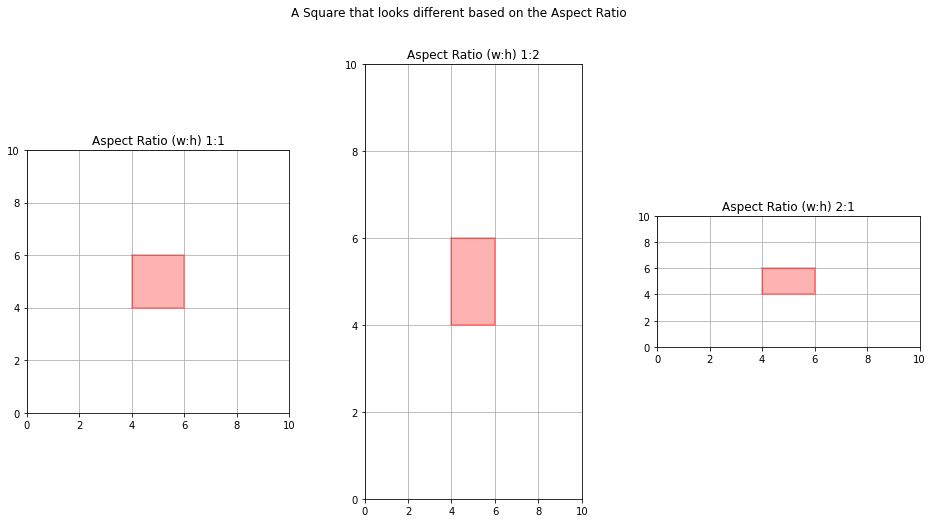

In [2]:
fig = img_gen.plot_squares(figsize = (16,8))
plt.show()

### 1.2 With Shared Units, it is not about the axis ranges or length

A common misconception is when people focus strictly on the length or the range of the axes. However, **A graph can have an aspect ratio of 1 while having different ranges for X and Y and/or having one axis longer/shorter than the other.** See the chart on the left.

Instead, we should focus on the size of 1 unit on both axes:

     If you were to measure 1" in y, is that the same amount as 1" in the x direction?

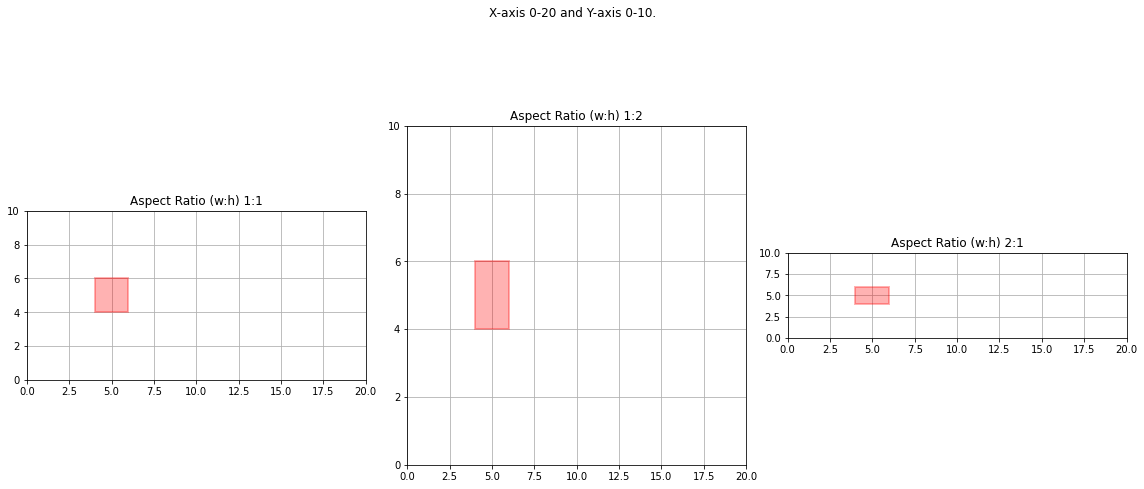

In [3]:
fig = img_gen.plot_squares_longer_xaxis(figsize = (16,8))
plt.show()

### 1.3 Aspect Ratio affects Visual Perception

The choice of aspect ratio determines the perception of steepness in slope. Let's look at three scenarios below:
- 1:1 Square aspect ratio. This is the correct aspect ratio since both axes are measured in the same units.
- 1:2 Tall aspect ratio. Suggests a much steeper slope.
- 2:1 Wide aspect ratio. Suggests a less steeper slope.

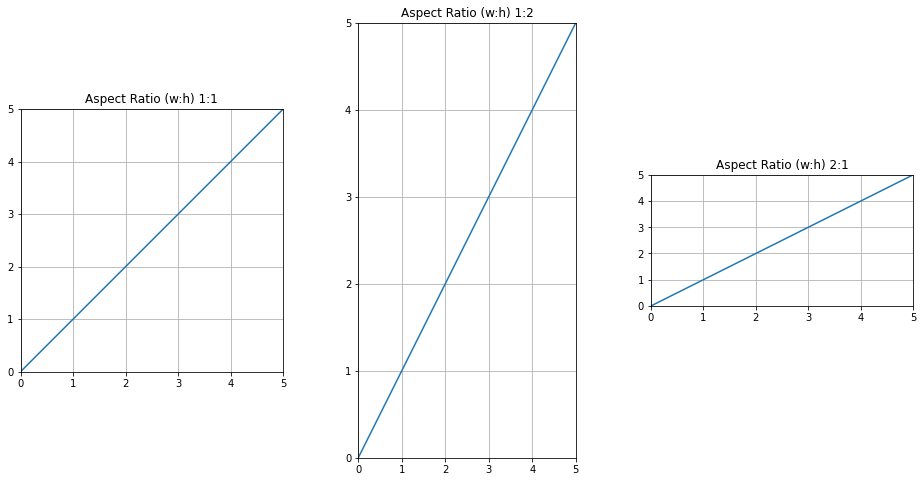

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,8))
x = [0, 1, 3, 4, 5]
y = x
for plot, asp_ratio, asp_ratio_str in zip(ax, ['equal', 2, 0.5], ['1:1', '1:2', '2:1']):
    plot.grid()
    plot.set_xlim(0,5)
    plot.set_ylim(0,5)
    plot.plot(x,y)
    plot.set_aspect(asp_ratio)
    plot.set_title('Aspect Ratio (w:h) ' + asp_ratio_str)
plt.show()

### 1.4 Be Careful with Default Aspect Ratios

Before writing this notebook, I haven't ever paid too much attention to the default aspect ratio after we execute `ax.plot`. However, I do now!

We'll now look at an example looking at average temperatures for Austin, Texas (my hometown) and San Diego (my office location).

In [5]:
df = pd.read_csv('temperature.csv')
df.head()

,Month,Austin,San Diego,Detroit
0,Jan,48,57,25
1,Feb,54,58,27
2,Mar,62,60,37
3,Apr,70,62,48
4,May,76,64,60


In [6]:
# Extract Data
temp_aus = df['Austin'].values
temp_sd = df['San Diego'].values
temp_dtw = df['Detroit'].values

# Appending initial value so we get a closed polygon
temp_aus = np.append(temp_aus, temp_aus[0])
temp_sd = np.append(temp_sd, temp_sd[0])
temp_dtw = np.append(temp_dtw, temp_dtw[0])

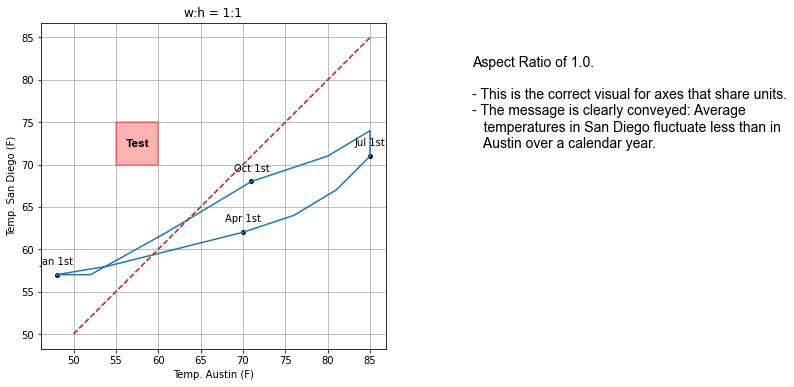

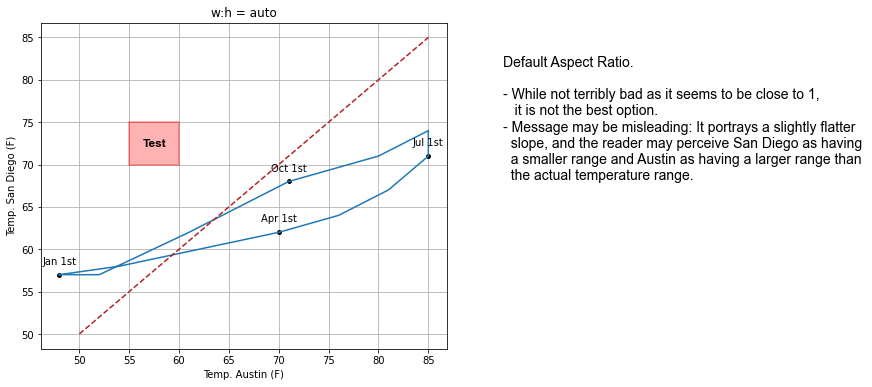

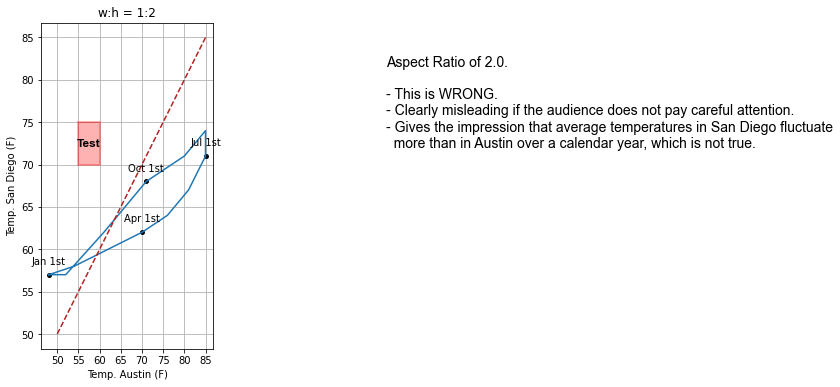

In [7]:
def add_notes(ax, txt = ""):
    ax.axis('off')
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    font_props_fig = dict(fontname="Arial", fontsize='14',
                        fontweight = 'normal', color = 'black')
    ax.text( x = 5, y = 90, s = txt, verticalalignment='top', horizontalalignment='left', **font_props_fig)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
img_gen.plot_temps(ax[0], temp_aus, temp_sd, 'equal', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:1")
add_notes(ax[1], """Aspect Ratio of 1.0.\n\n- This is the correct visual for axes that share units.
- The message is clearly conveyed: Average
   temperatures in San Diego fluctuate less than in
   Austin over a calendar year.
""")
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
img_gen.plot_temps(ax[0], temp_aus, temp_sd, 'auto', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = auto",)
add_notes(ax[1], """Default Aspect Ratio.\n\n- While not terribly bad as it seems to be close to 1,
   it is not the best option.
- Message may be misleading: It portrays a slightly flatter \n  slope, and the reader may perceive San Diego as having
  a smaller range and Austin as having a larger range than \n  the actual temperature range. """)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
img_gen.plot_temps(ax[0], temp_aus, temp_sd, 2, 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:2")
add_notes(ax[1],  """Aspect Ratio of 2.0.\n\n- This is WRONG.
- Clearly misleading if the audience does not pay careful attention.
- Gives the impression that average temperatures in San Diego fluctuate
  more than in Austin over a calendar year, which is not true.
""")
plt.show()

## 2.0 Aspect Ratio in Graphs with different units

Whenever the two axes are measured in different units (i.e., unrelated), we are technically allowed to arbitrarily **stretch** and/or **compress** the aspect ratio. However, the message we convey is shockingly different.

This illustration looks at the change in global temperature over time using three different aspect ratios. These three graphs are not wrong from a technical perspective, but two of them are **very misleading.**

In [8]:
df = pd.read_csv('global_temp_change.csv')
df.head()

,Year,Change
0,1880,-0.16
1,1881,-0.08
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


### 2.1 Same Data. Three Aspect Ratios and Three different perceptions

The wider and taller graphs exploit the aspect ratio to convey a different meaning. By flattening the line chart, I have also flattened the perception of the rising line. Instead, by shortening the graph, I give the opposite impression. The slope seems drastically steeper and may raise much more concerns. Both are misleading.

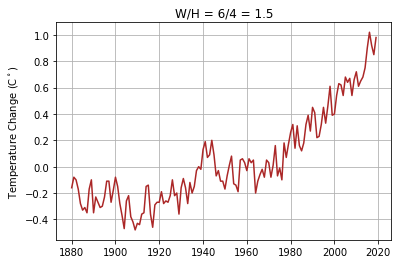

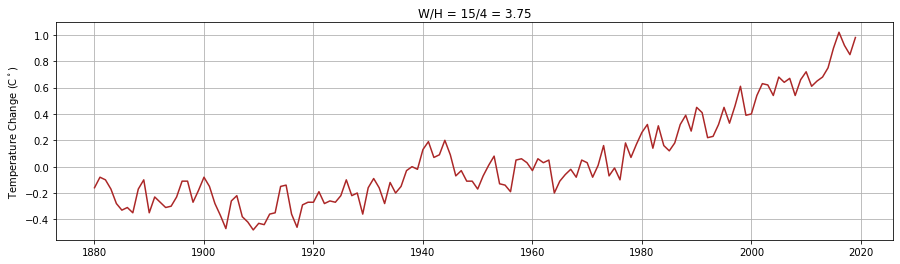

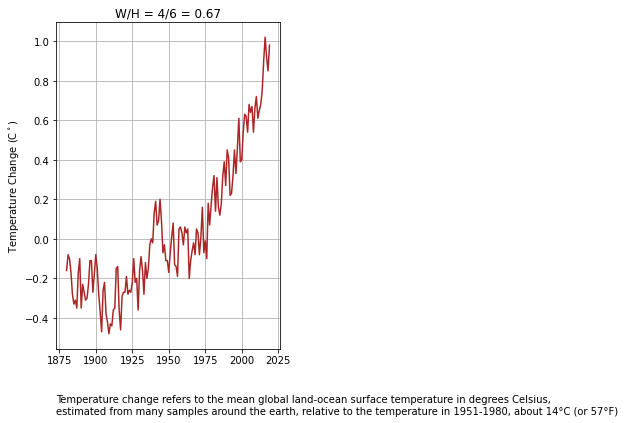

In [9]:
def temp_time_series(ax, figsize = None):
    if figsize is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots(figsize = figsize)
    ax.plot('Year', 'Change', data=df, color = '#AB2727')
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_ylabel(r'Temperature Change (C$^\circ$)')
    return fig, ax

def add_title_with_size(fig, ax):
    width, height = fig.get_size_inches()
    ax.set_title(f'W/H = {int(width)}/{int(height)} = {round(width/height, 2)}')
    plt.show()

# Default
fig, ax = temp_time_series(ax)
add_title_with_size(fig, ax)

# A wider Graph
print('')
fig, ax = temp_time_series(ax, figsize = (15, 4))
add_title_with_size(fig, ax)

# A Taller Graph
fig, ax = temp_time_series(ax, figsize = (4, 6))
note = """Temperature change refers to the mean global land-ocean surface temperature in degrees Celsius, 
estimated from many samples around the earth, relative to the temperature in 1951-1980, about 14°C (or 57°F)"""
    
ax.text(0,-0.2, note,transform = ax.transAxes)
add_title_with_size(fig, ax)

### 2.2 What makes these line charts misleading rather than wrong?

Changing the aspect ratio of a line chart does not violate a clearly-defined rule of data visualization. It’s not technically wrong, as long as it’s accurately labeled. But it’s definitely misleading

*Cairo states that we should design charts with an aspect ratio that “neither exaggerates nor minimizes change.*

### 2.3 Best Practices

Where does all of this leave us? If you feel confused, that’s because data visualization has no universal rule about aspect ratios. A couple of tips: 

- Never blindly accept the default chart. 
- Explore how different aspect ratios affect its appearance.
- Some experts advise that aspect ratios for line charts should follow the banking to 45 degrees

### 2.4 Banking to 45 degrees

In a [paper from 1988](https://www.jstor.org/stable/2288843), Bill Cleveland, Marylyn McGill, and Robert McGill proposed the idea that the average line slope in a line chart should be 45º. This has been dubbed banking to 45º and has turned into one of the bits of common wisdom in visualization as determining the ideal aspect ratio.

I found the algorithm to get the optimal ratio in the [R documentation](https://search.r-project.org/CRAN/refmans/ggthemes/html/bank_slopes.html). See the R code for this Google Stock example. If you find the Python implementation, let me know!

In [10]:
df = pd.read_csv('google.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


Text(0.5, 1.0, 'Default Aspect Ratio')

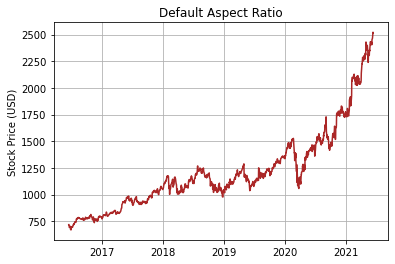

In [11]:
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(df['date']), df['close'].values, color = '#AB2727')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(r'Stock Price (USD)');
ax.set_title('Default Aspect Ratio')

From R `bank_slope`, we get y/x = 0.08524937. (See R code in repo).

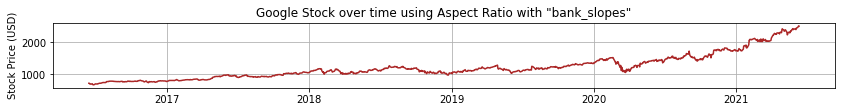

In [12]:
golden_ratio = 0.08524937
x = 14
fig, ax = plt.subplots(figsize = (x, golden_ratio*x))
ax.plot(pd.to_datetime(df['date']), df['close'].values, color = '#AB2727')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(r'Stock Price (USD)');
ax.set_title('Google Stock over time using Aspect Ratio with "bank_slopes"');